In [145]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [185]:
test_folder = "/home/mads/git/TCN/TCN/soil_classification/data/prelim_downsample_phase"
train_folder = "/home/mads/git/TCN/TCN/soil_classification/data/exp_1604/train"
val_folder = "/home/mads/git/TCN/TCN/soil_classification/data/exp_1604/test"

folder = val_folder
all_data= []
files = sorted([f for f in os.listdir(folder) if f.endswith(".csv")])
for f in files:
    raw_data = np.genfromtxt(os.path.join(folder,f),delimiter=',')
    all_data.append(raw_data)

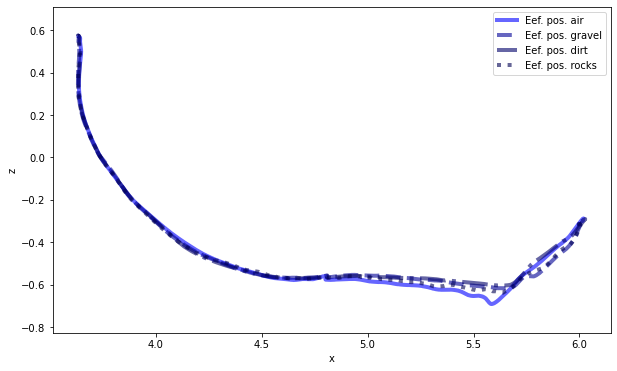

In [189]:
fig, ax1 = plt.subplots(figsize = [10,6])
prev_cl = []

l = []
for d in all_data:
    l.append(d[-1,-1])

sorted_idx = np.argsort(l)

all_data = np.array(all_data)[sorted_idx]

phase = None
derivative = False
norm = False
for d in all_data:
    cl = d[-1,-1]
    cl_scale = cl*0.7
    cls = "air" if cl == 0 else "gravel" if cl == 1 else "dirt" if cl == 2 else "rocks"
    if norm:
        d[:,1] = np.linalg.norm(d[:,1:4], axis = 1)
        d[:,2] = np.linalg.norm(d[:,4:7], axis = 1)
    
    if derivative:
        d[:,1:4] = np.gradient(d[:,1:4], axis=0)
    
    if cl not in prev_cl:
        if phase is None:
            ax1.plot(d[:,11],d[:,12], lw=4, ls=linestyles[int(cl)],color=[0,0,1/(cl_scale+1),0.6], label="Eef. pos. "+cls)
        else:
            mask = np.where(d[:,-2]==phase)
            first = mask[0][0]
            last = mask[0][-1]
            print(first, last)
            ax1.plot(d[first:last,0],d[first:last,1], lw=2, ls=linestyles[int(cl)],color=[1/(cl_scale+1),0,0,0.6], label="Lin. Acc. X "+cls)
            ax1.plot(d[first:last,0],d[first:last,2], lw=2, ls=linestyles[int(cl)],color=[0,1/(cl_scale+1),0,0.6],label="Lin. Acc. Y "+cls)
            ax1.plot(d[first:last,0],d[first:last,3], lw=2, ls=linestyles[int(cl)],color=[0,0,1/(cl_scale+1),0.6],label="Lin. Acc. Z "+cls)         
    prev_cl.append(cl)
    plt.xlabel("x")
    plt.ylabel("z")
    plt.ylim([-0.8,0.7])
    ax1.axis('equal')
plt.legend()
plt.show()

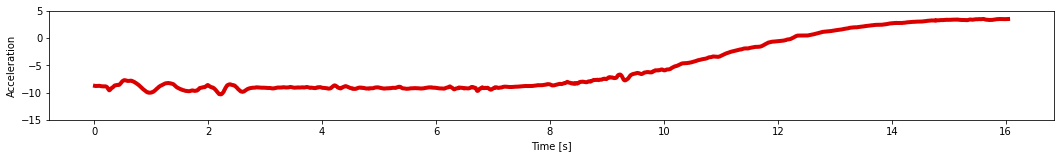

In [208]:
fig, ax1 = plt.subplots(figsize = [18,2])
prev_cl = []

l = []
for d in all_data:
    l.append(d[-1,-1])

sorted_idx = np.argsort(l)

all_data = np.array(all_data)[sorted_idx]

phase = None
derivative = False
norm = False
count = 0
for d in all_data:
    cl = d[-1,-1]
    cl_scale = cl*0.7
    cls = "air" if cl == 0 else "gravel" if cl == 1 else "dirt" if cl == 2 else "rocks"
    if norm:
        d[:,1] = np.linalg.norm(d[:,1:4], axis = 1)
        d[:,2] = np.linalg.norm(d[:,4:7], axis = 1)
    
    if derivative:
        d[:,1:4] = np.gradient(d[:,1:4], axis=0)
    
    if cl not in prev_cl:
        if phase is None:
            if count in [2]:
                #ax1.plot(d[:,0],d[:,1], lw=2, ls=linestyles[int(cl)],color=[1/(cl_scale+1),0,0,0.6], label="Lin. Acc. X "+cls)
                #ax1.plot(d[:,0],d[:,2],lw=2, ls=linestyles[int(cl)], color=[0,1/(cl_scale+1),0,0.6],label="Lin. Acc. Y "+cls)
                ax1.plot(d[:,0],d[:,3],lw=4, color=[1/(cl_scale/1.2),0,0,1],label="Lin. Acc. Z "+cls)
            count += 1
        else:
            mask = np.where(d[:,-2]==phase)
            first = mask[0][0]
            last = mask[0][-1]
            print(first, last)
            ax1.plot(d[first:last,0],d[first:last,1], lw=2, ls=linestyles[int(cl)],color=[1/(cl_scale+1),0,0,0.6], label="Lin. Acc. X "+cls)
            ax1.plot(d[first:last,0],d[first:last,2], lw=2, ls=linestyles[int(cl)],color=[0,1/(cl_scale+1),0,0.6],label="Lin. Acc. Y "+cls)
            ax1.plot(d[first:last,0],d[first:last,3], lw=2, ls=linestyles[int(cl)],color=[0,0,1/(cl_scale+1),0.6],label="Lin. Acc. Z "+cls)         
    prev_cl.append(cl)
    plt.xlabel("Time [s]")
    plt.ylabel("Acceleration")
    plt.ylim([-15,5])
#plt.legend(loc=1)
plt.show()

212 661
212 661
212 661
212 661


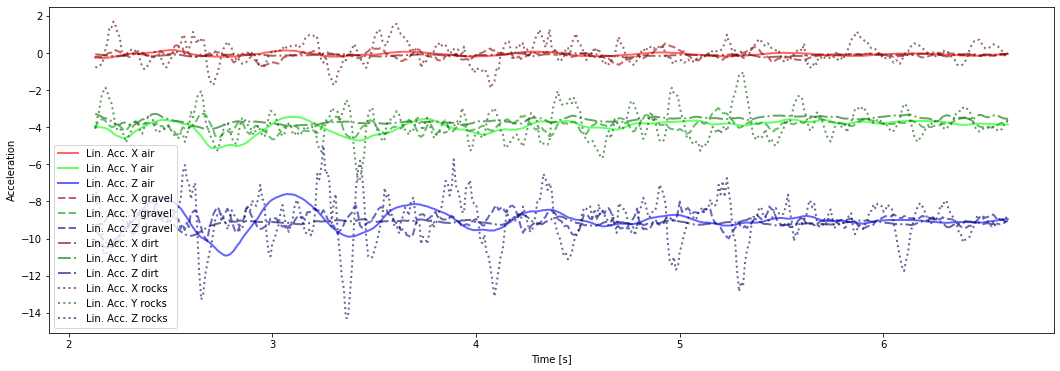

In [108]:
fig, ax1 = plt.subplots(figsize = [18,6])
prev_cl = []

l = []
for d in all_data:
    l.append(d[-1,-1])

sorted_idx = np.argsort(l)

all_data = np.array(all_data)[sorted_idx]

phase = 2
derivative = False
norm = False
for d in all_data:
    cl = d[-1,-1]
    cl_scale = cl*0.7
    cls = "air" if cl == 0 else "gravel" if cl == 1 else "dirt" if cl == 2 else "rocks"
    if norm:
        d[:,1] = np.linalg.norm(d[:,1:4], axis = 1)
        d[:,2] = np.linalg.norm(d[:,4:7], axis = 1)
    
    if derivative:
        d[:,1:4] = np.gradient(d[:,1:4], axis=0)
    
    if cl not in prev_cl:
        if phase is None:
            ax1.plot(d[:,0],d[:,1], color=[1/(cl_scale+1),0,0,0.6], label="Lin. Acc. X "+cls)
            ax1.plot(d[:,0],d[:,2], color=[0,1/(cl_scale+1),0,0.6],label="Lin. Acc. Y "+cls)
            ax1.plot(d[:,0],d[:,3], color=[0,0,1/(cl_scale+1),0.6],label="Lin. Acc. Z "+cls)
        else:
            mask = np.where(d[:,-2]==phase)
            first = mask[0][0]
            last = mask[0][-1]
            print(first, last)
            ax1.plot(d[first:last,0],d[first:last,1], lw=2, ls=linestyles[int(cl)],color=[1/(cl_scale+1),0,0,0.6], label="Lin. Acc. X "+cls)
            ax1.plot(d[first:last,0],d[first:last,2], lw=2, ls=linestyles[int(cl)],color=[0,1/(cl_scale+1),0,0.6],label="Lin. Acc. Y "+cls)
            ax1.plot(d[first:last,0],d[first:last,3], lw=2, ls=linestyles[int(cl)],color=[0,0,1/(cl_scale+1),0.6],label="Lin. Acc. Z "+cls)         
    prev_cl.append(cl)
    plt.xlabel("Time [s]")
    plt.ylabel("Acceleration")
plt.legend()
plt.show()

212 661
212 661
212 661
212 661


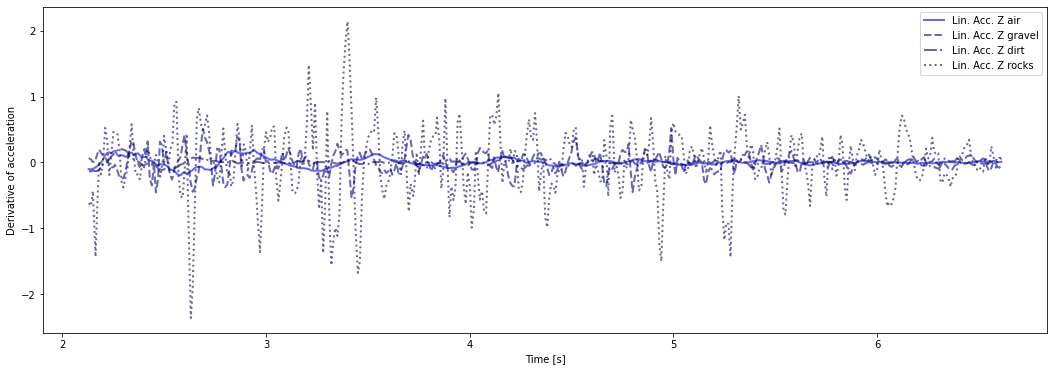

In [109]:
fig, ax1 = plt.subplots(figsize = [18,6])
prev_cl = []

l = []
for d in all_data:
    l.append(d[-1,-1])

sorted_idx = np.argsort(l)

all_data = np.array(all_data)[sorted_idx]

phase = 2
derivative = True

linestyles = ['-','--','-.',':']
for d in all_data:
    cl = d[-1,-1]
    cl_scale = cl*0.8
    cls = "air" if cl == 0 else "gravel" if cl == 1 else "dirt" if cl == 2 else "rocks"
    if derivative:
        d[:,1:4] = np.gradient(d[:,1:4], axis=0)
    
    if cl not in prev_cl:
        if phase is None:
            ax1.plot(d[:,0],d[:,1], color=[1/(cl_scale+1),0,0,0.6], label="Lin. Acc. X "+cls)
            ax1.plot(d[:,0],d[:,2], color=[0,1/(cl_scale+1),0,0.6],label="Lin. Acc. Y "+cls)
            ax1.plot(d[:,0],d[:,3], color=[0,0,1/(cl_scale+1),0.6],label="Lin. Acc. Z "+cls)
        else:
            mask = np.where(d[:,-2]==phase)
            first = mask[0][0]
            last = mask[0][-1]
            print(first, last)
            #ax1.plot(d[first:last,0],d[first:last,1], color=[1/(cl_scale+1),0,0,0.6], label="Lin. Acc. X "+cls)
            #ax1.plot(d[first:last,0],d[first:last,2], color=[0,1/(cl_scale+1),0,0.6],label="Lin. Acc. Y "+cls)
            ax1.plot(d[first:last,0],d[first:last,3],lw=2, ls=linestyles[int(cl)], color=[0,0,1/(cl_scale+1),0.6],label="Lin. Acc. Z "+cls)         
    prev_cl.append(cl)
    plt.xlabel("Time [s]")
    plt.ylabel("Derivative of acceleration")
plt.legend()
plt.show()

In [72]:
np.where(all_data[0][:,-2]==2)

(array([212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224,
        225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237,
        238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250,
        251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263,
        264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276,
        277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289,
        290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302,
        303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315,
        316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328,
        329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341,
        342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354,
        355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367,
        368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380,
        381, 382, 383, 384, 385, 386, 387, 388, 389

212 661
212 661
212 661
212 661


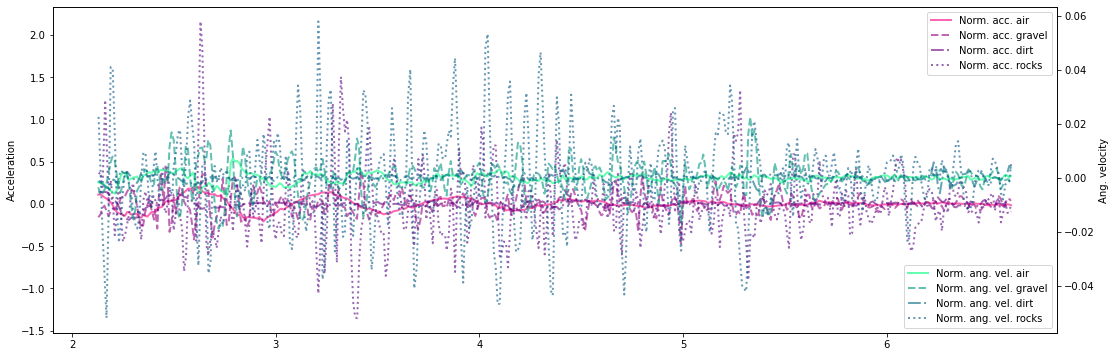

In [144]:
fig, ax1 = plt.subplots(figsize = [18,6])
prev_cl = []
ax2 = ax1.twinx()
l = []
for d in all_data:
    l.append(d[-1,-1])

sorted_idx = np.argsort(l)

all_data = np.array(all_data)[sorted_idx]

phase = 2
derivative = True
norm = True
for d in all_data:
    cl = d[-1,-1]
    cl_scale = cl*0.7
    cls = "air" if cl == 0 else "gravel" if cl == 1 else "dirt" if cl == 2 else "rocks"
    if norm:
        d[:,1] = np.linalg.norm(d[:,1:4], axis = 1)
        d[:,2] = np.linalg.norm(d[:,4:7], axis = 1)
    
    if derivative:
        d[:,1:4] = np.gradient(d[:,1:4], axis=0)
    
    if cl not in prev_cl:
        if phase is None:
            ax1.plot(d[:,0],d[:,1],lw=2, ls=linestyles[int(cl)], color=[1/(cl_scale+1),0,0.5,0.6], label="Norm. acc. "+cls)
            ax2.plot(d[:,0],d[:,2],lw=2, ls=linestyles[int(cl)], color=[0,1/(cl_scale+1),0.5,0.6],label="Norm. ang. vel. "+cls)
        else:
            mask = np.where(d[:,-2]==phase)
            first = mask[0][0]
            last = mask[0][-1]
            print(first, last)
            ax1.plot(d[first:last,0],d[first:last,1], lw=2, ls=linestyles[int(cl)],color=[1/(cl_scale+1),0,0.5,0.6], label="Norm. acc. "+cls)
            ax2.plot(d[first:last,0],d[first:last,2], lw=2, ls=linestyles[int(cl)],color=[0,1/(cl_scale+1),0.5,0.6],label="Norm. ang. vel. "+cls)
    prev_cl.append(cl)
    plt.xlabel("Time [s]")
    ax1.set_ylabel("Acceleration")
    ax2.set_ylabel("Ang. velocity")
ax1.legend(loc =1)
ax2.legend(loc =4)
#ax2.set_ylim([-0.02,0.5])
#ax1.set_ylim([5,15])
plt.show()

In [116]:
np.sqrt(10**2 + 4**2)

10.770329614269007